# Büyük Veri Analitiği

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#!pip install findspark

In [3]:
import pyspark
from pyspark import SparkContext

ModuleNotFoundError: No module named 'pyspark'

In [4]:
import findspark
findspark.init("C:\spark")

In [5]:
import pyspark
from pyspark import SparkContext

# Configurasyon ve Spark Bağlantısı 

In [6]:
from pyspark import SparkContext
sc = SparkContext(master = "local")
sc

<SparkContext master=local appName=pyspark-shell>

In [7]:
sc.version

'2.3.1'

In [8]:
sc.sparkUser()

'skumsar'

In [9]:
sc.appName

'pyspark-shell'

In [10]:
dir(sc)

['PACKAGE_EXTENSIONS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulatorServer',
 '_active_spark_context',
 '_batchSize',
 '_callsite',
 '_checkpointFile',
 '_conf',
 '_dictToJavaMap',
 '_do_init',
 '_ensure_initialized',
 '_gateway',
 '_getJavaStorageLevel',
 '_initialize_context',
 '_javaAccumulator',
 '_jsc',
 '_jvm',
 '_lock',
 '_next_accum_id',
 '_pickled_broadcast_vars',
 '_python_includes',
 '_repr_html_',
 '_serialize_to_jvm',
 '_temp_dir',
 '_unbatched_serializer',
 'accumulator',
 'addFile',
 'addPyFile',
 'appName',
 'applicationId',
 'binaryFiles',
 'binaryRecords',
 'broadcast',
 'cancelAllJobs',
 '

In [11]:
sc.stop()

In [12]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder \
    .master("local") \
    .appName("pyspark_uygulama") \
    .config("spark.executer.memory", "16gb") \
    .getOrCreate()

sc = spark.sparkContext
sc

<SparkContext master=local appName=pyspark_uygulama>

Spark ı daha gelişmiş ayarlarla başlattık. config kısmını ön tanımlı değerler kullanmak için kullanmak zorunda değilsiniz.

# Temel DataFrame İşlemleri

In [13]:
spark_df = spark.read.csv("diabetes.csv", header = True, inferSchema = True)

csv okuma işlemi Stages kısmında iş olarak gözükür.

In [14]:
spark_df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [15]:
type(spark_df) # pandas dataframe i değil

pyspark.sql.dataframe.DataFrame

In [16]:
spark_df.cache()

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

In [17]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [18]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"]) # sadece sürekli değişkenleri seç

In [19]:
type(df)

pandas.core.frame.DataFrame

# Pandas ve Spark Karşılaştırması

In [20]:
df.head() # seaborn veri setinde tablo şeklinde gözükür

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [21]:
spark_df.head() # spark veri setinde daha farklı gösterir

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

In [22]:
df.dtypes

carat    float64
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

In [23]:
spark_df.dtypes

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

In [24]:
df.ndim # boyut sayısı

2

In [25]:
spark_df.size # spark ndim, size(toplam eleman sayısı) özelliklerine sahip değildir

AttributeError: 'DataFrame' object has no attribute 'size'

## DataFrame İşlemleri - 1

* Pandas dataframe i paralel bir şekilde çalışamazken spark çalışabilir.
* Spark dili lazy evaluation dır.
* Spark immutable dır. Dönüştürme işlemleri gerçekleştirilir. Pandas değiştirilebilirdir.

In [26]:
spark_df.show(2, truncate = True)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 2 rows



In [27]:
spark_df.show(2)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 2 rows



In [28]:
spark_df.count() # gözlem sayısı

768

In [29]:
len(spark_df.columns) # kaç değişken var

9

In [30]:
spark_df.describe().show() # betimsel istatistik

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [31]:
#degisken secme

In [32]:
spark_df.describe("Glucose")

DataFrame[summary: string, Glucose: string]

In [33]:
spark_df.describe("Glucose").show()

+-------+-----------------+
|summary|          Glucose|
+-------+-----------------+
|  count|              768|
|   mean|     120.89453125|
| stddev|31.97261819513622|
|    min|                0|
|    max|              199|
+-------+-----------------+



In [34]:
spark_df.select("Glucose","Pregnancies").show(5) # değişkenleri seçerek ilk 5 gözlem

+-------+-----------+
|Glucose|Pregnancies|
+-------+-----------+
|    148|          6|
|     85|          1|
|    183|          8|
|     89|          1|
|    137|          0|
+-------+-----------+
only showing top 5 rows



In [35]:
spark_df.select("Glucose").distinct().count() # eşsiz gözlemler

136

In [36]:
spark_df.select("Glucose").dropDuplicates().show() #  # duplice değerleri kaldırarak eşsiz değerler

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    137|
|     65|
|    133|
|     78|
|    155|
|    108|
|    193|
|    115|
|    126|
|    101|
|     81|
|    183|
|     76|
|    159|
|     44|
|    103|
|     91|
|    128|
+-------+
only showing top 20 rows



In [37]:
spark_df.select("Glucose").dropDuplicates().count()

136

In [38]:
spark_df.crosstab("Outcome","Pregnancies").show() # iki değişken arasında cross değerler

+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Outcome_Pregnancies|  0|  1| 10| 11| 12| 13| 14| 15| 17|  2|  3|  4|  5|  6|  7|  8|  9|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|                  1| 38| 29| 10|  7|  4|  5|  2|  1|  1| 19| 27| 23| 21| 16| 25| 22| 18|
|                  0| 73|106| 14|  4|  5|  5|  0|  0|  0| 84| 48| 45| 36| 34| 20| 16| 10|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [39]:
spark_df.dropna().count() # gözlem sayımız 768 old için eksik gözlem yoktur

768

In [40]:
spark_df.dropna().show(3) # eksik gözlemlerden kurtulmak

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 3 rows



In [41]:
#gozlem secme

In [42]:
spark_df.filter(spark_df.Age >40).count()

194

Spark lazy bir dil olduğu için spark_df.groupby("Outcome").count() ifadesinin sonuna show() eklenir.

In [43]:
spark_df.groupby("Outcome").count()

DataFrame[Outcome: int, count: bigint]

In [44]:
spark_df.groupby("Outcome").count().show() # gruplama yaparak Outcome bağımlı değişkeninin sınıflarını saydırır

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [45]:
spark_df.groupby("Outcome").agg({"BMI": "mean"}).show() # Outcome sınıflarına göre BMI ortalaması

+-------+-----------------+
|Outcome|         avg(BMI)|
+-------+-----------------+
|      1|35.14253731343278|
|      0|30.30419999999996|
+-------+-----------------+



In [46]:
spark_df.withColumn("yeni_degisken", spark_df.BMI / 2).select("BMI","yeni_degisken").show(5) # BMI değişkenini 2ye bölerek yeni değişken oluştur

+----+-------------+
| BMI|yeni_degisken|
+----+-------------+
|33.6|         16.8|
|26.6|         13.3|
|23.3|        11.65|
|28.1|        14.05|
|43.1|        21.55|
+----+-------------+
only showing top 5 rows



In [47]:
spark_df.withColumnRenamed("Outcome","bagimli_degisken").columns # outcome değişkeninin ismini değiştirme işlemini sonuna columns getirerek gözlemleriz

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'bagimli_degisken']

In [48]:
spark_df.head()

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

In [49]:
spark_df.show(3)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 3 rows



In [50]:
spark_df.drop("Insulin").columns # belirttiğimiz değişkeni silme

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [51]:
spark_df.groupby("Outcome").count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [52]:
spark_df.groupby("Outcome").count().show()[0]

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



TypeError: 'NoneType' object is not subscriptable

In [53]:
spark_df.groupby("Outcome").count().show()[0:1,0:1]

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



TypeError: 'NoneType' object is not subscriptable

In [54]:
spark_df.groupby("Outcome").count().toPandas()
# Spark tarafından veriyi çekerek pandas da local işlemler gerçekleştirmek için toPandas() kullanılır.

,Outcome,count
0,1,268
1,0,500


In [55]:
a = spark_df.groupby("Outcome").count().toPandas() # pandas operasyonlarına geçiş için nesne oluşturduk

In [56]:
a

,Outcome,count
0,1,268
1,0,500


In [57]:
a.iloc[0:1,0:1]

,Outcome
0,1


In [58]:
a.iloc[1,1]

500

In [59]:
a.iloc[1:,1:]

,count
1,500


# SQL İşlemleri

In [60]:
sc

<SparkContext master=local appName=pyspark_uygulama>

In [61]:
spark_df.registerTempTable("table_df") # spark dataframe üzerinde işlemler yapmak için

In [62]:
spark.sql("show databases").show() # default isimli bir veritabanı

+------------+
|databaseName|
+------------+
|     default|
+------------+



In [63]:
spark.sql("show tables").show() # tabloyu görüntüle

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
|        | table_df|       true|
+--------+---------+-----------+



In [64]:
spark.sql("select Glucose from table_df").show(5) # sorgu işlemini gerçekleştir

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
+-------+
only showing top 5 rows



In [65]:
spark.sql("select Outcome, mean(Glucose) from table_df group by Outcome").show(5) # outcome a göre sınıflandırarak Glucose ortalamasını al 

+-------+------------------+
|Outcome|      avg(Glucose)|
+-------+------------------+
|      1|141.25746268656715|
|      0|            109.98|
+-------+------------------+



# Büyük Veri Görselleştirme

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
sns.barplot(x = "Outcome", y = spark_df.Outcome.index, data = spark_df)
# fonksiyonlar pandas dataframe den spark a dönüştürülerek çalışır

AttributeError: 'DataFrame' object has no attribute 'get'

In [68]:
sdf = spark_df.toPandas()
sdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Aggregation işlemi gerçekleşti. Tutun ki burada daha karmaşık bir işlem oldu. Buradaki aggregation işlemleri gibi daha doğrusu şurada çok daha karmaşık işlemler olduğunu düşünelim. İşte bunları arka tarafta spark sql aracılığıyla spark dataframe aracılığıyla dönüştürüp indirgeyip bu nihai sonucu toPandas diyerek çağırdığınızda o büyük verinin büyük yükünü aslında sparka yaptırmış oluyoruz. Gelen sonucu görselleştirmek için bu sefer kullanabiliyoruz. Buradaki a örneğinde olduğu gibi işte şimdi biz bu verimiz küçük olduğu için bir aggregation işleminden ziyade direkt toPandas ile sdf olarak isimlendirdik. Bu görselleştirme işlemini çok kolay bir şekilde gerçekleştirebiliriz.

<AxesSubplot:xlabel='Outcome'>

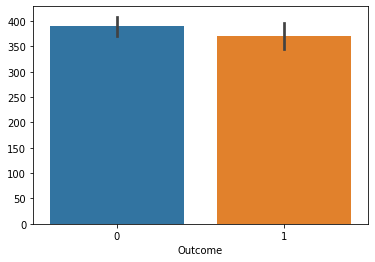

In [69]:
sns.barplot(x = "Outcome", y = sdf.Outcome.index, data = sdf)

# Uçtan Büyük Veride Makine Öğrenmesi

## Spark Session ve Veri Seti

In [61]:
sc.stop()

Birkaç alt bölümden oluşacak ve spark başlatmaktan website tanımasına, keşifçi veri analizine, veri ön işleme basamaklarına ve makine öğrenmesi modellemesinde model tuning işlemlerine ve yeni bir müşteri geldiğinde ki çöl problemiyle ilgileniyor olacağız. Müşterinin bizi terk edip terk etmeyeceğini tahmin etmeye çalışmak gibi tamamen gerçek hayatın tam içerisinden uçtan uca bir büyük veride makine öğrenmesi işleminin nasıl gerçekleştirilebileceğini ele almış olacağız.

In [70]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder \
    .master("local") \
    .appName("churn_modellemesi") \
    .config("spark.executer.memory", "16gb") \
    .getOrCreate()

sc = spark.sparkContext
sc

<SparkContext master=local appName=pyspark_uygulama>

In [71]:
spark_df = spark.read.csv("churn.csv", 
                          header = True, 
                          inferSchema = True,
                          sep = ",")
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

Churn isimli bir veri setini localinden spark a taşıyıp keşke cache leme işlemini gerçekleştiririz.

In [72]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



_c0 diye muhtemelen hoşumuza gitmeyecek bir veri olacak. Verilerimizde names, age total purchase ve account manager gibi böyle çeşitli değişkenler var. Years, num sites gibi ve churn olup olmama durumunu ifade eden bir bağımlı değişkenimiz var. 

In [73]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



Bizi terk edip terk etmeme durumlarını modellemeye çalışacağız. Veri setini incelediğimizde c0 verisinin indeks olduğunu anladık. Bu görüntüde beni rahatsız eden şuradaki _co ifadesinin belirli bir standartta olması gerekir. Öncelikle bütün değişkenleri bir küçük harfe çevirmemiz gerekiyor.

In [74]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])

Buradan gezilecek olan ve yakalayacak olduktan sonra tüm değişken isimlerini küçüğe çevirecek olan işlemi tanımlamış oluyoruz. Nerede peki bu işlemi yapalım, onu da spark_df ve değişkenleri columns şeklinde ifade ettiğimizde, bu işlemi bir çalıştıralım. 

In [75]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



Benim kişisel tercihim olduğu için değişken isimlerinde çalışmanın bu şekli ben orada ifade etmemiştim ama orada da böyle bir değişkenlerin isimlerine dönüşümler falan yapmak istersen map fonksiyonunu kullanıyoruz.

In [76]:
#df.columns = map(str.lower, df.columns)

In [77]:
spark_df = spark_df.withColumnRenamed("_c0", "index") # hangi değişken değişecek, nasıl değişecek(index olmasını istiyoruz)

In [78]:
spark_df.show(2)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 2 rows



In [79]:
spark_df.count() #gözlem sayısı

900

In [81]:
len(spark_df.columns) #değişken sayısı

8

In [82]:
spark_df.columns #değişken isimleri

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [83]:
spark_df.distinct().count() # eşsiz gözlem sayısı

900

In [84]:
spark_df.select("names").distinct().count() # kişiler unique mi

899

2 tane Kevin mı var? Neden 899 çoklama mı var?

In [85]:
spark_df.groupby("names").count().sort("count", ascending = False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|   Jennifer Wood|    2|
|     John Barber|    1|
|Patrick Robinson|    1|
+----------------+-----+
only showing top 3 rows



Jennifer Wood iki kere geçmiş. Bu bir çoklama mı yoksa farklı veriler içeren aynı isimli müşteri midir? Gürültü varsa kurtulmak gerekir.

In [86]:
spark_df.filter(spark_df.names == "Jennifer Wood").show() # Jennifer Wood isimli gözlem birimleri

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



İki kişi çoklama değil farklı kişilerdir. Peki çoklama olsaydı duplicate senaryosu ile karşılaşalım.

In [87]:
spark_df.select("names").dropDuplicates().groupBy("names").count().sort("count",ascending = False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|    Patrick Bell|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
+----------------+-----+
only showing top 3 rows



Jennifer Wood duplicate kayıttan geçici kurtulduk. sort işlemi çoktan aza olduğu için jennifer aşağıya indi.

In [88]:
spark_df.where(spark_df.index == 439).select("names").show() # 439 indexli Jennifer Wood kişisine erişme

+-------------+
|        names|
+-------------+
|Jennifer Wood|
+-------------+



In [89]:
jen = spark_df.where(spark_df.index == 439).collect()[0]["names"] # 439 indexli name değişkenini saklayıp başka yerde girdi olarak kullanmak istersek
# collect ile spark çıktıları girdi olarak pandas nesnesi gibi alırız

In [90]:
type(jen)

str

In [92]:
dir(jen)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

In [93]:
jen.upper() # local python fonk kullandık

'JENNIFER WOOD'

## Keşifçi Veri Analizi

In [94]:
print(spark_df.describe().show()) # istatiksel betimleme

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [95]:
spark_df.select("age","total_purchase", "account_manager", "years","num_sites","churn").describe().toPandas().transpose() 
#index ve names(nümerik olmadığı için) hariç tüm değişkenleri görselleştirdik

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


churn değişkenine baktığımızda biraz dengesiz bir veri olabileceğini düşünürüz.

In [96]:
spark_df.filter(spark_df.age > 47).count()

161

Modelin ayırt ediciliklerini tespit etmeliyiz. Hedef değişkeni analiz edelim.

In [97]:
spark_df.groupby("churn").count().show() # Hafif dengesiz

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [98]:
spark_df.groupby("churn").agg({"total_purchase": "mean"}).show() #churn değişkeninin 1,0 olma durumlarına göre satın alma toplamları çok etkilemez

+-----+-------------------+
|churn|avg(total_purchase)|
+-----+-------------------+
|    1| 10192.179933333337|
|    0| 10036.952853333332|
+-----+-------------------+



In [99]:
spark_df.groupby("churn").agg({"years": "mean"}).show() # years değişkeninin bağımlı değişkenle ilgisi

+-----+------------------+
|churn|        avg(years)|
+-----+------------------+
|    1|5.8835999999999995|
|    0|5.1510666666666625|
+-----+------------------+



In [100]:
kor_data = spark_df.drop("index","names","churn").toPandas() # bağımlı değişkeni çıkarırak bağımsız değişkenlerin birbirleriyle ilgisini inceleriz

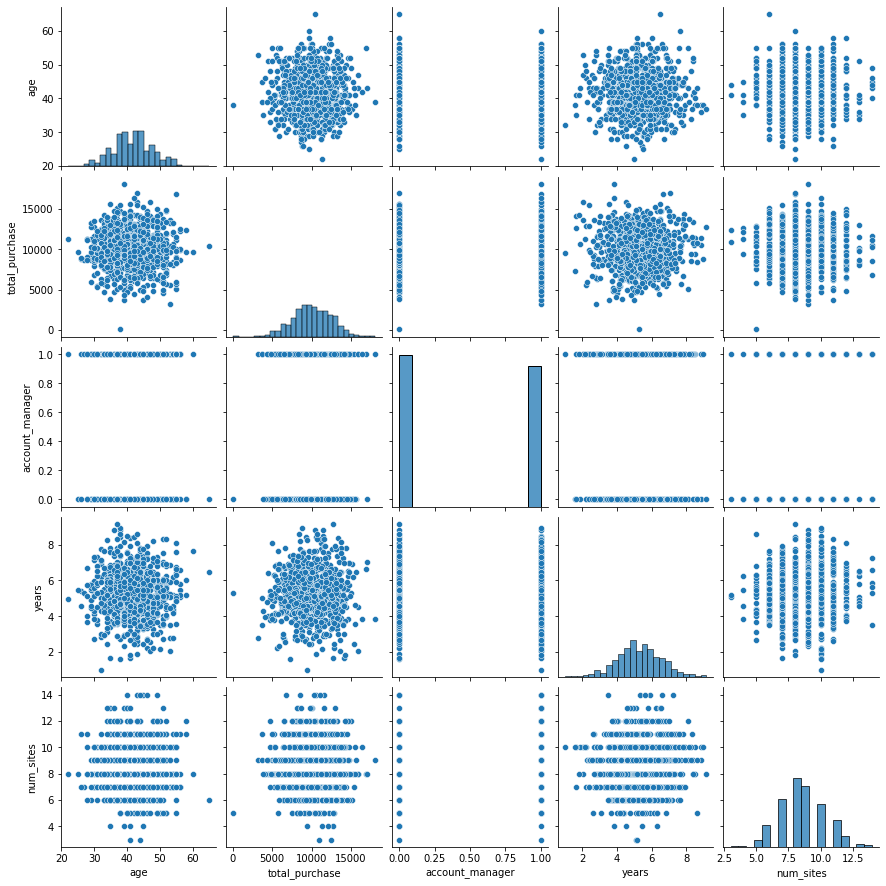

In [102]:
import seaborn as sns
sns.pairplot(kor_data);

account_manager verileri 1,0 lardan oluştuğu için anlamlı ilişki çıkmaz. age,total_purchase, years, num_sites verilerini churn ü boyut olarak ekleyerek incelediğimizde ayrım daha netleşir.

In [103]:
kor_data = spark_df.drop("index","names").toPandas() # churn değişkenini boyut olarak ekledik, ayırt edicilik için bağımlı değişkeni eklemeyi deneyelim

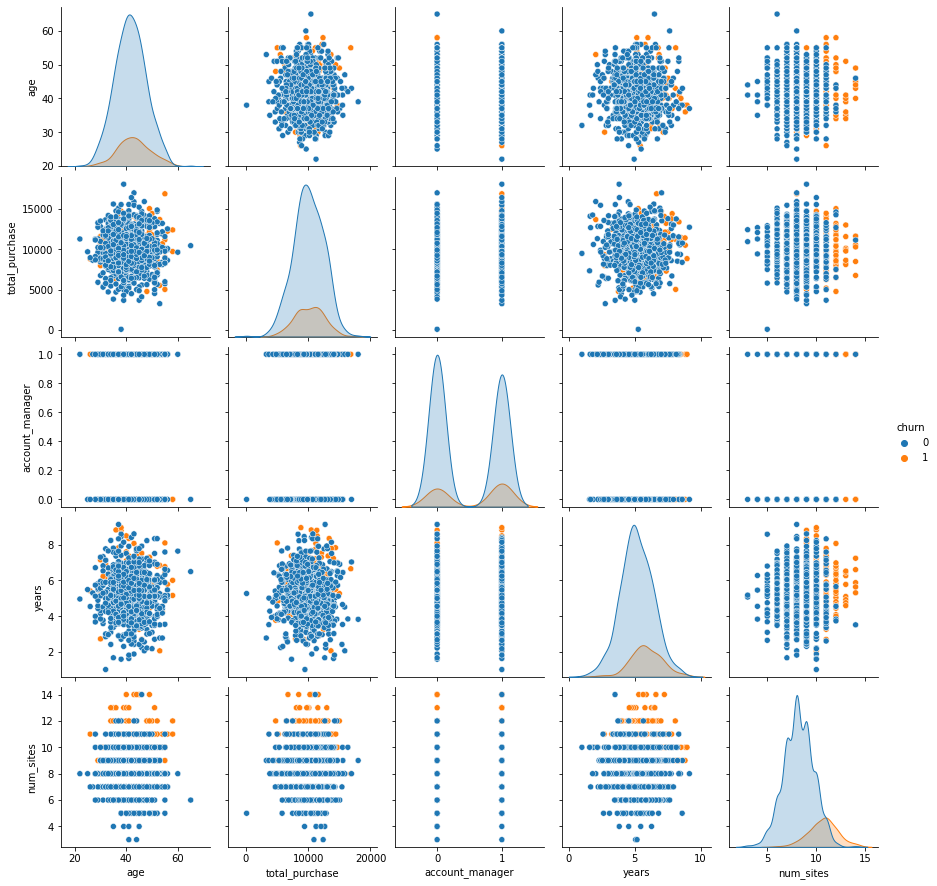

In [104]:
import seaborn as sns
sns.pairplot(kor_data, hue = "churn");

Grafikte bağımlı değişkeni direkt eklemek yerine anlamlı bağımsız değişkenleri seçerek doğrusal ilişki analizi yapalım.

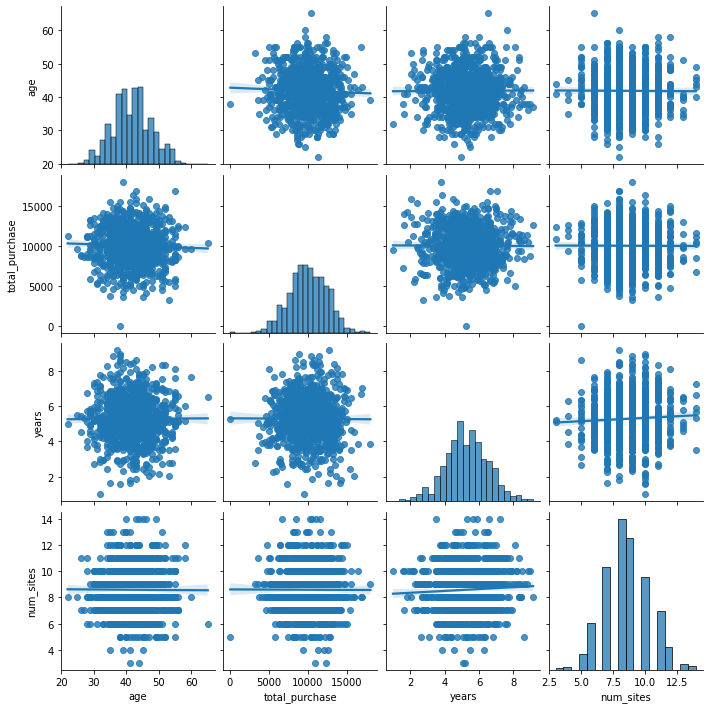

In [106]:
sns.pairplot(kor_data, vars = ["age", "total_purchase","years","num_sites"], 
            kind = "reg");

Toz bulutları gibi görmek yerine

Bağımlı değişkeni yoğunluk olarak ekleyip doğrusal ilişki analizi yapalım.

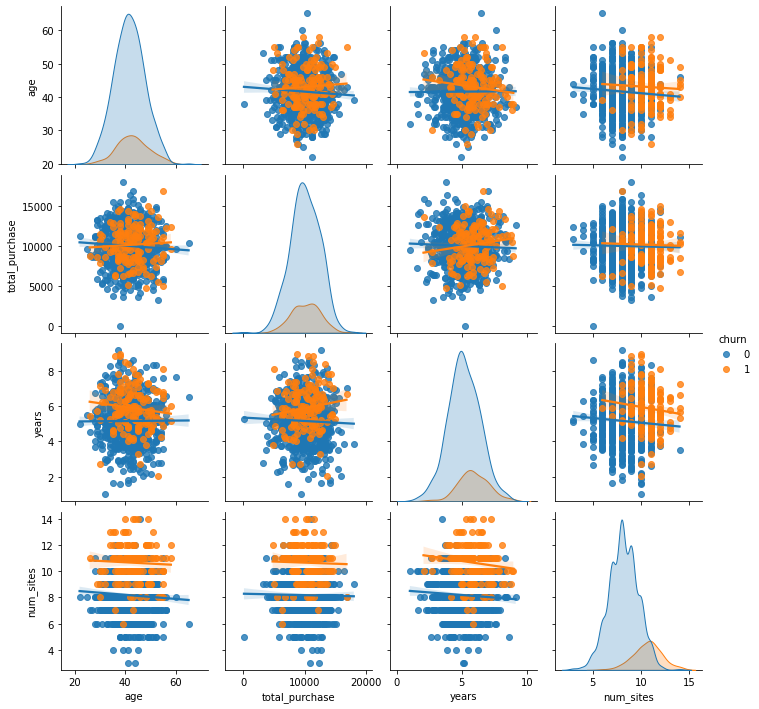

In [108]:
sns.pairplot(kor_data, vars = ["age", "total_purchase","years","num_sites"], 
             hue = "churn",
            kind = "reg");

Korelasyona çok takılmayın. Regresyon eğirilerine bakarak bağımsız değişkenlerin birbirleri arasında negatif pozitif yönlü ilişkiler yorumlanır. Churn değişkeninde 1 sınıfı için age ve total_purchase değişkenleri arasında pozitif yönlü ilişki varken 0 sınıfı için negatif yönlü bir ilişki vardır. 1 sınıfı hep yukarıda kalmıştır. Sürekli değişken bazında değişkenlerin bağımlı değişkenle ilişkisini incelemiş olduk.

## Veri Ön İşleme

In [109]:
spark_df = spark_df.dropna() # eksik gözlemlerden kurtul

In [110]:
spark_df = spark_df.withColumn("age_kare", spark_df.age**2) # yaş karesi değişkeni ekle

In [111]:
spark_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
only showing top 3 rows



In [112]:
from pyspark.ml.feature import StringIndexer
# bağımlı değişkenlere label denir
stringIndexer = StringIndexer(inputCol = "churn", outputCol = "label")

In [114]:
?stringIndexer
# bağımlı değişkende en çok veri olan sınıf 0 (ön tanımlıdır).

Type:           StringIndexer
String form:    StringIndexer_4a1d8c2806ed50ccf47d
File:           c:\spark\python\pyspark\ml\feature.py
Docstring:     
A label indexer that maps a string column of labels to an ML column of label indices.
If the input column is numeric, we cast it to string and index the string values.
The indices are in [0, numLabels). By default, this is ordered by label frequencies
so the most frequent label gets index 0. The ordering behavior is controlled by
setting :py:attr:`stringOrderType`. Its default value is 'frequencyDesc'.

>>> stringIndexer = StringIndexer(inputCol="label", outputCol="indexed", handleInvalid="error",
...     stringOrderType="frequencyDesc")
>>> model = stringIndexer.fit(stringIndDf)
>>> td = model.transform(stringIndDf)
>>> sorted(set([(i[0], i[1]) for i in td.select(td.id, td.indexed).collect()]),
...     key=lambda x: x[0])
[(0, 0.0), (1, 2.0), (2, 1.0), (3, 0.0), (4, 0.0), (5, 1.0)]
>>> inverter = IndexToString(inputCol="indexed", output

In [115]:
indexed = stringIndexer.fit(spark_df).transform(spark_df)  # label formatını double formatına çevirdi

In [116]:
indexed.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'double')]

In [117]:
spark_df = indexed.withColumn("label", indexed["label"].cast("integer")) # label değerini int değerine dönüştür, bağımlı değişken ayarlandı.

In [118]:
spark_df.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'int')]

In [119]:
#bagimsiz degiskenlerin ayarlanmasi

In [120]:
from pyspark.ml.feature import VectorAssembler

In [121]:
spark_df.columns # bağımsız değişkenlerin isimleri

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_kare',
 'label']

In [122]:
bag = ["age","total_purchase", "account_manager","years","num_sites"] # ilişkili olan bağımsız değişkenler

In [123]:
vectorAssembler = VectorAssembler(inputCols = bag, outputCol = "features") # Assembler vektör oluşturarak bag nesnesine yani bağımsız değişkenlere feature denir.

In [124]:
va_df = vectorAssembler.transform(spark_df)

In [125]:
final_df = va_df.select(["features","label"])

In [126]:
final_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
|[48.0,10356.02,0....|    1|
|[44.0,11331.58,1....|    1|
|[32.0,9885.12,1.0...|    1|
|[43.0,14062.6,1.0...|    1|
|[40.0,8066.94,1.0...|    1|
|[30.0,11575.37,1....|    1|
|[45.0,8771.02,1.0...|    1|
|[45.0,8988.67,1.0...|    1|
|[40.0,8283.32,1.0...|    1|
|[41.0,6569.87,1.0...|    1|
|[38.0,10494.82,1....|    1|
|[45.0,8213.41,1.0...|    1|
|[43.0,11226.88,0....|    1|
|[53.0,5515.09,0.0...|    1|
|[46.0,8046.4,1.0,...|    1|
+--------------------+-----+
only showing top 20 rows



## Test-train

In [127]:
splits = final_df.randomSplit([0.7,0.3]) # train %70, test %30
train_df = splits[0]
test_df = splits[1]

In [128]:
train_df

DataFrame[features: vector, label: int]

In [129]:
test_df

DataFrame[features: vector, label: int]

# GBM ile Müşteri Terk Modellemesi

In [130]:
from pyspark.ml.classification import GBTClassifier

In [131]:
gbm = GBTClassifier(maxIter = 10, featuresCol = "features", labelCol = "label") # itr ver, bağımsız değişken, bağımlı değişken -> gbm model nesnesi

In [132]:
gbm_model = gbm.fit(train_df) # model kurma

In [133]:
y_pred = gbm_model.transform(test_df) # test verisini test etmek için transform kullan

In [134]:
y_pred # içerisinden gerçek değerleri ve tahmin değerleri alalım

DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [135]:
ac = y_pred.select("label","prediction")

In [136]:
ac.filter(ac.label == ac.prediction).count() / ac.count() # accuracy değeri, valide edilmemiş test hatası
# valide ederek cv kullanmak gerekir

0.8846153846153846

### Optimum model

In [137]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder()
             .addGrid(gbm.maxDepth, [2, 4, 6])
             .addGrid(gbm.maxBins, [20, 30])
             .addGrid(gbm.maxIter, [10, 20])
             .build())

cv = CrossValidator(estimator= gbm, estimatorParamMaps = paramGrid, evaluator=evaluator, numFolds= 10)

In [138]:
cv_model = cv.fit(train_df)

Girelim bakın jobs kısmına giriyorum. Şu an bakın takip edilen bir iş burada gösterilmiş, aynı zamanda jüpiter'e de çalışma ifadesi(kum saati)  var. Event timeline da görüldüğü üzere şu anda bu işlem hâlâ sürüyor. Arkada scala hala çalışıyor Aslında biz python üzerinden bazı fonksiyonları çalıştırdığınızda bu hangi tarafta skalaya çeviriyor? 

Yani aslında bir aracı yani mesela skalaya sparka olan uzaklık R, python, scala şeklindedir R biraz daha görece uzaktır. Python yine biraz daha uzaktır ama en yakın Spark veya scala bu işleri yapmaktadır. Dolayısıyla arkaplanda böyle bir dönüştürme işlemleri gerçekleşiyor.

In [139]:
y_pred = cv_model.transform(test_df)
ac = y_pred.select("label","prediction")

Bir seçme işlemi yapacağız. Seçme işlemi sonrasında accuracy değerlendirmeyle ilgili fonksiyonumuzu yazalım.

In [140]:
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8807692307692307

In [141]:
# Eğri altında kalan değere ulaşmak için
evaluator.evaluate(y_pred)

0.8778935185185182

Tabi ki modeli kurduk. %85 Çok başarılı tahmin yaptık.  Şimdi sorun belli bir departmanını geliştirdiğimiz düşünelim ve belirli müşteri özellikleri geldiğinde bu müşterilerin bizi terk edip etmeyeceğini tahmin etmek istediğimizi düşünelim.

## Bu müşteriler bizi terk eder mi?

Pandas üzerinden seri oluşturarak yeni veriler oluşturalım. Belirli müşterilerin bizi terk edip etmeyeceğini test edelim.

In [142]:
import pandas as pd
names = pd.Series(["Ali Ahmetoğlu", "Berkcan Tanerbey", "Harika Gündüz","Polat Alemdar", "Ata Bakmayan Ali"])
age = pd.Series([38, 43, 34, 50, 40])
total_purchase = pd.Series([30000, 10000, 6000, 30000, 100000])
account_manager = pd.Series([1,0,0,1,1])
years = pd.Series([20, 10, 3, 8, 30])
num_sites = pd.Series([30,8,8,6,50])


yeni_musteriler = pd.DataFrame({
    'names':names,
    'age': age,
    'total_purchase': total_purchase,
    'account_manager': account_manager ,
    'years': years,
    'num_sites': num_sites})

yeni_musteriler.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [143]:
yeni_musteriler

,names,age,total_purchase,account_manager,years,num_sites
0,Ali Ahmetoğlu,38,30000,1,20,30
1,Berkcan Tanerbey,43,10000,0,10,8
2,Harika Gündüz,34,6000,0,3,8
3,Polat Alemdar,50,30000,1,8,6
4,Ata Bakmayan Ali,40,100000,1,30,50


Modelin kat sayılarını sisteme entegre ettiğimizi düşünelim. Model nesnemiz cv_model e bazı değerler sorarak tahmin almak için önce pandas dataframeimizi spark a dönüştürelim.

In [145]:
yeni_sdf = spark.createDataFrame(yeni_musteriler) # pandas -> pyspark.sql

In [146]:
type(yeni_sdf)

pyspark.sql.dataframe.DataFrame

In [147]:
yeni_sdf.show()

+----------------+---+--------------+---------------+-----+---------+
|           names|age|total_purchase|account_manager|years|num_sites|
+----------------+---+--------------+---------------+-----+---------+
|   Ali Ahmetoğlu| 38|         30000|              1|   20|       30|
|Berkcan Tanerbey| 43|         10000|              0|   10|        8|
|   Harika Gündüz| 34|          6000|              0|    3|        8|
|   Polat Alemdar| 50|         30000|              1|    8|        6|
|Ata Bakmayan Ali| 40|        100000|              1|   30|       50|
+----------------+---+--------------+---------------+-----+---------+



Yeni müşterileri daha önceki kullandığımız bağımsız değişkenlerin vektör formatına dönüştürelim.

In [148]:
yeni_musteriler = vectorAssembler.transform(yeni_sdf) # vector formatı

In [149]:
sonuclar = cv_model.transform(yeni_musteriler) # yeni_musteriler verisini valide edilmiş modelde kullan

In [150]:
# Churn olup olmadıklarını görmek için tahminleri gösterelim
sonuclar.select("names","prediction").show()

+----------------+----------+
|           names|prediction|
+----------------+----------+
|   Ali Ahmetoğlu|       1.0|
|Berkcan Tanerbey|       0.0|
|   Harika Gündüz|       0.0|
|   Polat Alemdar|       0.0|
|Ata Bakmayan Ali|       1.0|
+----------------+----------+



## Diğer Bazı Modeller

In [151]:
from pyspark.ml.classification import LogisticRegression
loj = LogisticRegression(featuresCol = "features", labelCol = 'label', maxIter=10)
loj_model = loj.fit(train_df)
y_pred = loj_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8653846153846154

In [152]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dt_model = dt.fit(train_df)
y_pred = dt_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8961538461538462

In [153]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rf_model = rf.fit(train_df)
y_pred = rf_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.9076923076923077